<a href="https://colab.research.google.com/github/Ciachula/Python-training/blob/main/Python1_4_(12_12_)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pakietów
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Wczytanie pliku csv - dodatkowe parametry - nagłówek, nazwy kolumn, typ danych
df = pd.read_csv('employees-data.csv', header=None,
                 names = ['name', 'surname', 'PESEL'],
                 dtype = {'PESEL' : str})

In [ ]:
df.shape

(25, 3)

In [ ]:
# metoda obliczająca datę urodzenia - in progress
def get_date(pesel):
  year = pesel[0:2]
  month = pesel[2:4]
  day = pesel[4:6]
  if int(month)>12:
    year = "20" + year
    month = str(int(month) - 20)
  else:
    year = "19" + year
  return datetime.datetime.strptime(f'{day}-{month}-{year}', '%d-%m-%Y')

# metoda obliczająca wiek na podstawie daty urodzenia
def get_age(date_birth):
  return math.floor((datetime.datetime.now() - date_birth).days/365.25)

# metoda określająca płeć na podstawie peselu
def get_sex(pesel):
  # elementy listy muszą być typu string - sprawdzany pesel jest string.
  if pesel[9] in ['0', '2', '4', '6', '8']: # Czy wartość znajduje się w liście
    return "Female"
  else:
    return "Male"

In [ ]:
#metoda okreslajaca miesiac na podstawie daty

def get_month(data_urodzenia):
    return data_urodzenia.month

df['month'] = df['date_birth'].apply(get_month)
df.dtypes

name                  object
surname               object
PESEL                 object
date_birth    datetime64[ns]
age                    int64
sex                   object
month                  int64
dtype: object

In [ ]:
df['date_birth'] = df['PESEL'].apply(get_date)
df['age'] = df['date_birth'].apply(get_age)
df['sex'] = df['PESEL'].apply(get_sex)
df

,name,surname,PESEL,date_birth,age,sex,month
0,Rozalia,Olejnik,03302154004,2003-10-21,19,Female,10
1,Marlena,Wierzbicka,99091503680,1999-09-15,23,Female,9
2,Oleksii,Sikora,02210841550,2002-01-08,20,Male,1
3,Florian,Laskowski,03321815739,2003-12-18,19,Male,12
4,Milosz,Zieba,86080910275,1986-08-09,36,Male,8
5,Leonarda,Owczarek,78080468667,1978-08-04,44,Female,8
6,Franciszka,Marek,63072610661,1963-07-26,59,Female,7
7,Diana,Matuszewska,94032262424,1994-03-22,28,Female,3
8,Bartosz,Kucharski,78103055856,1978-10-30,44,Male,10
9,Honorata,Urbaniak,00222093686,2000-02-20,22,Female,2


In [ ]:
# Funkcja group by - zliczanie ilości osób z konkretną płcią
sex = df[['sex', 'name']].groupby(['sex']).count()
sex.index

Index(['Female', 'Male'], dtype='object', name='sex')

In [ ]:
df[['month','name']].groupby(['month']).count()

,name
month,
1,2
2,1
3,1
4,1
5,1
6,3
7,2
8,3
9,4


In [ ]:
df[['sex','age']].groupby(['sex']).mean()

,age
sex,
Female,27.769231
Male,30.666667


In [ ]:
df[['sex','age']].groupby(['sex']).std()

,age
sex,
Female,12.070307
Male,14.015143


In [ ]:
x = [1, 2, 3]
y = [1, 2, 3]
type(x)

list

In [ ]:
x1 = np.array(x)
y1 = np.array(y)
z1 = x1*y1
z1

array([1, 4, 9])

In [ ]:
np.sum(z1)

14

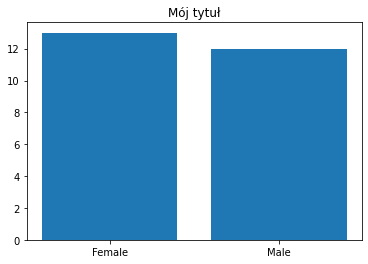

In [ ]:
plt.bar(sex.index,sex['name'])
plt.title('Mój tytuł')
#plt.legend()
plt.show()

(array([4., 5., 9., 7.]),
 array([ 1.  ,  3.75,  6.5 ,  9.25, 12.  ]),
 <BarContainer object of 4 artists>)

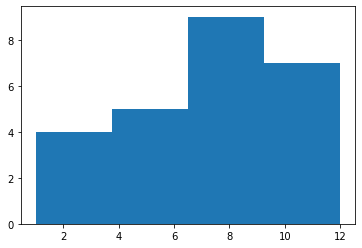

In [ ]:
#histogram
plt.hist(df['month'], bins=4)

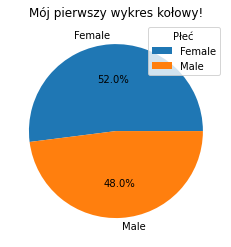

In [ ]:
#pie_chart
plt.pie(sex['name'], labels = sex.index, autopct ='%1.1f%%')
plt.title("Mój pierwszy wykres kołowy!")
plt.legend(title = 'Płeć')
plt.show()

In [ ]:
def validatePesel(pesel):
    if len(pesel) == 11:
        wagi = [1,3,7,9,1,3,7,9,1,3]
        wagi = np.array(wagi)
        p = []
        for i in pesel[:-1]:
            p.append(int(i))
        p = np.array(p)
        result = wagi * p
        result1 = result%10
        result2 = sum(result1)
        result3 = str(result2)[-1]
        print(result3)
        
        #if pesel = index ostatni
    else:
        return "nie oki"

In [ ]:
validatePesel("01271398371")

9
